# Numerical Linear Algebra (FMNN01)
__LTH Fall 2019__
## Assignment 2
__Jonas Lundgren__

In [1]:
import numpy as np
from scipy.linalg import qr

# Task 1

The class `Orthogonalization` contains the functions used in the different tasks.

In [2]:
class Orthogonalization:
    
    def __init__(self, A = None):
        self.A = A
        
    def gramschmidt(self):
        """
        Task 1
        
        Implementing the Gram-Schmidt method from pg 58 in 
        Lloyd N. Trefethen and David Bau III, Numerical Linear Algebra
        """
        m, n = self.A.shape
        Q = np.zeros([m,n])
        
        Q[:,0] = self.A[:,0]/np.linalg.norm(A[:,0])
        
        for j in range(1,n):
            v_j = self.A[:,j]
            
            for i in range(j):
                q_i = Q[:,i]
                r_ij = np.dot(q_i.T, self.A[:,j])
                v_j = v_j - np.dot(r_ij, q_i)
                
            r_jj = np.linalg.norm(v_j)
            Q[:, j] = v_j/r_jj
            
        return Q
    
        
    def task2(self):
        """
        Task 2
        """
        Q = self.gramschmidt()
        m,n = self.A.shape
        eig = np.linalg.eigvals(np.dot(Q.T, Q))
        
        print("The matrix Q contains basis vactors for a matrix A of size {}x{}".format(m,n))
        print("The 2-norm of Q         : {}".format(np.linalg.norm(Q,2)))
        print("The 2-norm of QT Q = I  : {}".format(np.linalg.norm(np.dot(Q.T, Q),2)))
        print("Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : {}\n".format(np.allclose(eig, 
                                                                                                           np.ones(n), 
                                                                                                           rtol=1e-10)))
        
    def task3(self):
        """
        Task 3
        """
        Q, R = qr(self.A)
        
        m,n = self.A.shape
        eig = np.linalg.eigvals(np.dot(Q.T, Q))
        
        print("The matrix Q contains basis vactors for a matrix A of size {}x{}".format(m,n))
        print("The 2-norm of Q         : {}".format(np.linalg.norm(Q,2)))
        print("The 2-norm of QT Q = I  : {}".format(np.linalg.norm(np.dot(Q.T, Q),2)))
        print("Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : {}\n".format(np.allclose(eig, 
                                                                                                            np.ones(m),
                                                                                                            rtol=1e-10)))
    def householder_step(a):
        """
        One Householder step from lecture 5 of the 
        FMNN01 Numerical Linear Algebra at LTH fall 2019
        """
        ahat = np.array([np.linalg.norm(a, 2)] + (len(a) - 1) * [0.])
        v = a - ahat
        v = v / (np.linalg.norm(v,2))
        H = np.eye(len(a)) - 2 * np.outer(v,v)
        
        return H
        
    def task4(self):
        """
        Task 4
        
        Implemented Housholder QR Factorization from pg 73-74 in 
        Lloyd N. Trefethen and David Bau III, Numerical Linear Algebra
        and using householder_step from lecture 5 of the 
        FMNN01 Numerical Linear Algebra at LTH fall 2019
        """
        m, n = self.A.shape

        R = np.copy(self.A)
        Q = np.eye(m)
        
        for i in range(n - (m == n)):
            H = np.eye(m)
            H[i:, i:] = Orthogonalization.householder_step(R[i:, i])
            
            Q = np.dot(Q, H)
            R = np.dot(H, R)
        return Q, R
    
    def task5(self):
        m, n = self.A.shape
        
        R = np.copy(self.A)
        Q = np.eye(m)
        
        for i in range(n):
            for j in reversed(range(i + 1, m)):
                
                if R[j, i] != 0:
                    r = np.sqrt(R[i, i]**2 + R[j, i]**2)
                    c, s = R[i, i]/r, -R[j, i]/r

                    G = np.identity(m)
                    G[[i, j], [i, j]] = c
                    G[j, i] = s
                    G[i, j] = -s

                    R = np.dot(G, R)
                    Q = np.dot(Q, G.T)
        return Q, R

# Task 2

I will not include a matrix of size 10002$\times$10000 as it taks long time and Claus said it was okay to not include the large matrices. eighenvalues has been rounded to 10 decimal points for easier read. We would expect them all to be 1. Which they seem to be.

In [3]:
ns = [1,10,100,1000]

for n in ns:
    m = n+2
    A = np.random.random([m,n])
    
    orthogonal = Orthogonalization(A)
    orthogonal.gramschmidt()
    orthogonal.task2()

The matrix Q contains basis vactors for a matrix A of size 3x1
The 2-norm of Q         : 1.0
The 2-norm of QT Q = I  : 1.0
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 12x10
The 2-norm of Q         : 1.000000000000001
The 2-norm of QT Q = I  : 1.0000000000000024
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 102x100
The 2-norm of Q         : 1.0000000000001577
The 2-norm of QT Q = I  : 1.0000000000003155
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 1002x1000
The 2-norm of Q         : 1.000000000164939
The 2-norm of QT Q = I  : 1.000000000329878
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True



# Task 3

The comand `qr` produces the full QR Factorization so that Q is a m$\times$m matirx.

In [4]:
ns = [1,10,100,1000]

for n in ns:
    m = n+2
    A = np.random.random([m,n])
    
    orthogonal = Orthogonalization(A)
    orthogonal.gramschmidt()
    orthogonal.task3()

The matrix Q contains basis vactors for a matrix A of size 3x1
The 2-norm of Q         : 1.0
The 2-norm of QT Q = I  : 1.0000000000000002
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 12x10
The 2-norm of Q         : 1.0000000000000004
The 2-norm of QT Q = I  : 1.0000000000000002
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 102x100
The 2-norm of Q         : 1.0000000000000004
The 2-norm of QT Q = I  : 1.0000000000000007
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True

The matrix Q contains basis vactors for a matrix A of size 1002x1000
The 2-norm of Q         : 1.0000000000000007
The 2-norm of QT Q = I  : 1.0000000000000016
Are the eigenvalues equal to 1 (with a 10 decimal points precision)? : True



We see that for the larger matricies the 2-norm of both $Q$ and $Q^T Q$ are closer to 1 when using the `qr` command rather than the implemented `gramschmidt`. There are rounding errors when using the `gramschmid`. The errors increases for large matrices as Gram-Schmidt is an iterative method causing Gram-Schmidt to be numerically unstable. 

# Task 4

We creating a 102x100 matrix A to check the implementation of the QR factorization of a fullrank m × n matrix with Householder transformations.

In [5]:
n, m = 100, 100 + 2
A = np.random.random([m,n])

orthogonal = Orthogonalization(A)
Q, R = orthogonal.task4()

We check if $Q$ is orthogonal. By checking if $Q^T Q = I$ and $Q Q^T = I$ using a tolerance of $10^{-10}$.

In [6]:
print("Is Q^T Q = I? :", np.allclose(Q.T @ Q, np.eye(m), rtol = 1e-10))
print("Is Q Q^T = I? :", np.allclose(Q @ Q.T, np.eye(m), rtol = 1e-10))

Is Q^T Q = I? : True
Is Q Q^T = I? : True


We check if $Q R = A$ using a tolerance of $10^{-10}$.

In [7]:
print("Is Q R = A? :", np.allclose(Q @ R, A, rtol = 1e-10))

Is Q R = A? : True


We compare the result to `scipy.linalg.qr` using a tolerance of $10^{-10}$.

In [8]:
print("Is the implementation of Q = Q from scipy.linalg.qr? :", np.allclose(Q, qr(A)[0], rtol = 1e-10))

Is the implementation of Q = Q from scipy.linalg.qr? : False


We take a closer look at some of the values to see what differs.

In [9]:
scipy_Q, scipy_R = qr(A)
print("My Q: \n", np.round(Q,3))
print("")
print("SciPy Q: \n", np.round(scipy_Q,3))

My Q: 
 [[ 0.094 -0.016 -0.008 ...  0.207  0.016  0.042]
 [ 0.088 -0.109  0.18  ... -0.052 -0.023  0.004]
 [ 0.032  0.033  0.061 ...  0.1   -0.003 -0.204]
 ...
 [ 0.013  0.188 -0.021 ... -0.115  0.033  0.105]
 [ 0.039  0.128  0.026 ...  0.068  0.04   0.078]
 [ 0.07  -0.07   0.114 ...  0.138 -0.152  0.082]]

SciPy Q: 
 [[-0.094 -0.016  0.008 ...  0.207  0.045 -0.004]
 [-0.088 -0.109 -0.18  ... -0.052 -0.002  0.024]
 [-0.032  0.033 -0.061 ...  0.1   -0.197 -0.052]
 ...
 [-0.013  0.188  0.021 ... -0.115  0.11  -0.003]
 [-0.039  0.128 -0.026 ...  0.068  0.086 -0.018]
 [-0.07  -0.07  -0.114 ...  0.138  0.038  0.168]]


We can see that there is a sign shift in the first column that might change later in the algoritm.

We take a look at the $R$ matirx aswell.

In [10]:
print("My R: \n", np.round(R,3))
print("")
print("SciPy R: \n", np.round(scipy_R,3))

My R: 
 [[ 5.779  4.665  4.094 ...  4.018  4.247  4.545]
 [ 0.     3.671  1.318 ...  1.998  1.373  1.896]
 [-0.    -0.     3.476 ...  1.182  1.314  0.916]
 ...
 [ 0.    -0.     0.    ...  0.     0.     0.492]
 [-0.     0.    -0.    ... -0.     0.     0.   ]
 [ 0.    -0.    -0.    ... -0.    -0.     0.   ]]

SciPy R: 
 [[-5.779 -4.665 -4.094 ... -4.018 -4.247 -4.545]
 [ 0.     3.671  1.318 ...  1.998  1.373  1.896]
 [ 0.     0.    -3.476 ... -1.182 -1.314 -0.916]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.492]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


And we conclud that there is a difference in sign here aswell, otherwise the values look similar.

# Task 5

1. A rotation in $\mathbb{R}^n$ is a linear maping $R : \mathbb{R}^n \rightarrow \mathbb{R}^n$ that a plane $P \subseteq \mathbb{R}^n$ containing the origin is rotated by R and leaving every vecort orthogonal to P where it is.

2. We reflect a vector $a$ onto the coordinate axis using $H$. This will result in a new vecor with norm as the only non zero value in the new vector $\hat{a}$. i.e $Ha = H[a_1, ..., a_n] = [\Vert a\Vert_2, 0, ..., 0] = \hat{a}$ if we reflect onto the first axis. This is done by constructing a matrix $H = I - 2 \frac{vv^t}{\Vert v\Vert_2}$ where $v = a - \hat{a}$ and the term $\frac{vv^t}{\Vert v\Vert_2}$ is therefore a projection on the span V and the $-2$ is what makes the reflection. This process is done over and over while we for each step reduce the dimenstions of $H$ by 1. 

5. http://www.cs.rpi.edu/~flaherje/pdf/lin13.pdf and https://www.math.usm.edu/lambers/mat610/sum10/lecture9.pdf

6.

In [11]:
n, m = 100, 100 + 2
A = np.random.random([m,n])

orthogonal = Orthogonalization(A)
Q, R = orthogonal.task5()

We check if $Q$ is orthogonal. By checking if $Q^T Q = I$ and $Q Q^T = I$ using a tolerance of $10^{-10}$.

In [12]:
print("Is Q^T Q = I? :", np.allclose(Q.T @ Q, np.eye(m), rtol = 1e-10))
print("Is Q Q^T = I? :", np.allclose(Q @ Q.T, np.eye(m), rtol = 1e-10))

Is Q^T Q = I? : True
Is Q Q^T = I? : True


We check if $Q R = A$ using a tolerance of $10^{-10}$.

In [13]:
print("Is Q R = A? :", np.allclose(Q @ R, A, rtol = 1e-10))

Is Q R = A? : True


We conclude that the QR-decomposition using Givens rotation seems to work, we also take a look and compare the results to `scipy.linalg.qr`.

In [14]:
scipy_Q, scipy_R = qr(A)
print("My Q: \n", np.round(Q,3))
print("")
print("SciPy Q: \n", np.round(scipy_Q,3))

My Q: 
 [[ 0.143  0.053  0.035 ... -0.026 -0.099  0.052]
 [ 0.058  0.175  0.104 ... -0.066  0.199  0.119]
 [ 0.099  0.119 -0.112 ...  0.08  -0.033 -0.016]
 ...
 [ 0.016  0.026  0.041 ... -0.174 -0.163 -0.183]
 [ 0.076  0.148 -0.01  ... -0.179 -0.105 -0.028]
 [ 0.051 -0.054  0.153 ... -0.071  0.05   0.132]]

SciPy Q: 
 [[-0.143 -0.053  0.035 ... -0.026 -0.086  0.071]
 [-0.058 -0.175  0.104 ... -0.066 -0.034 -0.229]
 [-0.099 -0.119 -0.112 ...  0.08   0.002  0.037]
 ...
 [-0.016 -0.026  0.041 ... -0.174  0.108  0.221]
 [-0.076 -0.148 -0.01  ... -0.179 -0.014  0.108]
 [-0.051  0.054  0.153 ... -0.071 -0.103 -0.097]]


As in __Task 4__ we see that there is a sign shift in the first column that might change later in the algoritm when comparing my $Q$ to `scipy.linalg.qr`.

7.

From looking at my implementation of Householder’s and Givens’ method I would say that Householder’s is faster since it contains 1 loop whereas my implementation of Givens’ contains nested loops. This could however be my implementaion and the double loop could be replaced with `np.tril_indices` which returns the indices for the lower-triangle of an (n, m) array. We check how long time the 2 different methods take to execute.

In [15]:
n, m = 100, 100 + 2
A = np.random.random([m,n])

orthogonal = Orthogonalization(A)

Householder’s method.

In [16]:
%%time
Q, R = orthogonal.task4()

CPU times: user 58.2 ms, sys: 14 µs, total: 58.2 ms
Wall time: 30.7 ms


Givens’ method.

In [17]:
%%time
Q, R = orthogonal.task5()

CPU times: user 1.52 s, sys: 12 ms, total: 1.53 s
Wall time: 774 ms


We see that Householder’s method takes less time than Givens’ method.

# Task 6

- For a three-striped flag I would sugest using rank $r = 3$ since the information cotained in the flag consists of 3 different pixelvalues for 3 different areas which both should be able to stored using a rank 3 matrix.

In [18]:
%matplotlib inline

In [19]:
import scipy.misc as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

We load the image and display it using `matplotlib`.

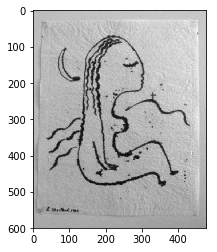

In [20]:
kvinna = sm.imread("kvinnagr.jpg",True)
plt.imshow(kvinna, cmap = "gray");

In [21]:
from scipy.linalg import svd
from scipy.linalg import diagsvd

We construct the SVD.

In [22]:
U, s, Vt = svd(kvinna)
S = diagsvd(s, U.shape[0], Vt.shape[0])

The 2-norm of the difference of the original matrix and the product of the matrices forming the SVD.

In [23]:
np.linalg.norm(U @ S @ Vt - kvinna, 2)

0.2091522

We take a look at the singular values.

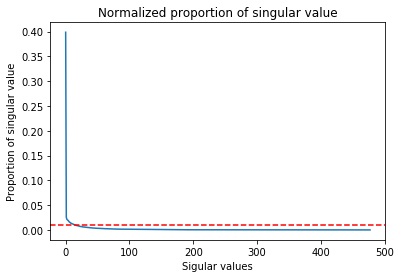

In [24]:
plt.plot(s/sum(s))
plt.xlabel("Sigular values")
plt.ylabel("Proportion of singular value")
plt.title("Normalized proportion of singular value");
plt.axhline(y=0.01, color='r', linestyle='dashed');

We set the tolorance to 0.01 which can be seen in the above image. We set all singular values below the tolorance to 0 and keep the ones above the theshold.

In [25]:
s_comp = np.array([i if i/sum(s) > 0.01 else 0 for i in s])

Constucting a matrix `kvinna_comp` using only the singular values $\sigma_i$ where $\frac{\sigma_i}{\sum (sigma_i)} > 0.01$.

In [26]:
S_comp = diagsvd(s_comp, U.shape[0], Vt.shape[0])
kvinna_comp = U @ S_comp @ Vt

(-0.5, 477.5, 599.5, -0.5)

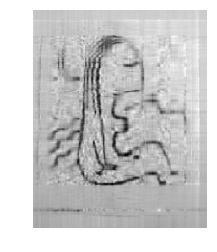

In [27]:
plt.imshow(kvinna_comp, cmap = "gray");
plt.axis('off') 

We see that the figure resembles the original figure. It seems to be quite noisy compared to the original.

Lets take a look at the resulting image for different thresholds!

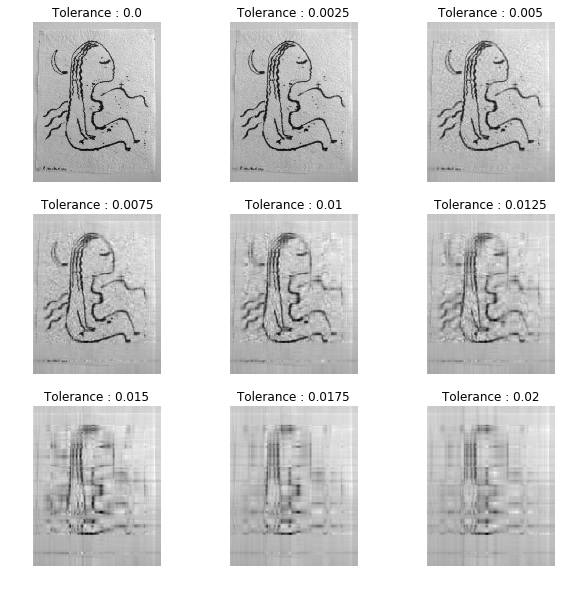

In [28]:
thresholds = np.linspace(0,0.02,9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for ax, th in zip(axes.ravel() ,thresholds):
    s_comp = np.array([i if i/sum(s) > th else 0 for i in s])
    S_comp = diagsvd(s_comp, U.shape[0], Vt.shape[0])
    kvinna_comp = U @ S_comp @ Vt
    #axes[j%3 ,int(j/3)] = plt.imshow(kvinna_comp, cmap = "gray")
    ax.imshow(kvinna_comp, cmap = "gray")
    ax.set_title(str("Tolerance : {}".format(th)))
    ax.axis('off') 

plt.show()

We can see that the compresed image is more and more blury as the threshold for how many $\sigma$'s to include increases. This is due to us using fewer $\sigma$'s and thus less information is contained.